In [272]:
# 필요한 라이브러리 import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [273]:
# 데이터 불러오기
carDf = pd.read_csv('./CarAccident.csv')

In [274]:
# carDf 데이터 형태와 엔트리 갯수 확인
carDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

In [275]:
# carDf의 null값 몇 개 있는 지 확인
carDf.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [276]:
# carDf의 중복되는 데이터 확인
carDf.duplicated().sum()

0

In [277]:
# carDf의 null값을 가지고 있는 행 삭제하기
carDf.drop("LSOA_of_Accident_Location",axis=1,inplace = True)
carDf.dropna(inplace=True)
carDf.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

array([[<AxesSubplot: title={'center': 'Location_Easting_OSGR'}>,
        <AxesSubplot: title={'center': 'Location_Northing_OSGR'}>,
        <AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Police_Force'}>],
       [<AxesSubplot: title={'center': 'Accident_Severity'}>,
        <AxesSubplot: title={'center': 'Number_of_Vehicles'}>,
        <AxesSubplot: title={'center': 'Number_of_Casualties'}>,
        <AxesSubplot: title={'center': 'Day_of_Week'}>,
        <AxesSubplot: title={'center': 'Local_Authority_(District)'}>],
       [<AxesSubplot: title={'center': '1st_Road_Class'}>,
        <AxesSubplot: title={'center': '1st_Road_Number'}>,
        <AxesSubplot: title={'center': 'Road_Type'}>,
        <AxesSubplot: title={'center': 'Speed_limit'}>,
        <AxesSubplot: title={'center': 'Junction_Detail'}>],
       [<AxesSubplot: title={'center': 'Junction_Control'}>,
        <AxesSubplot: title={'cen

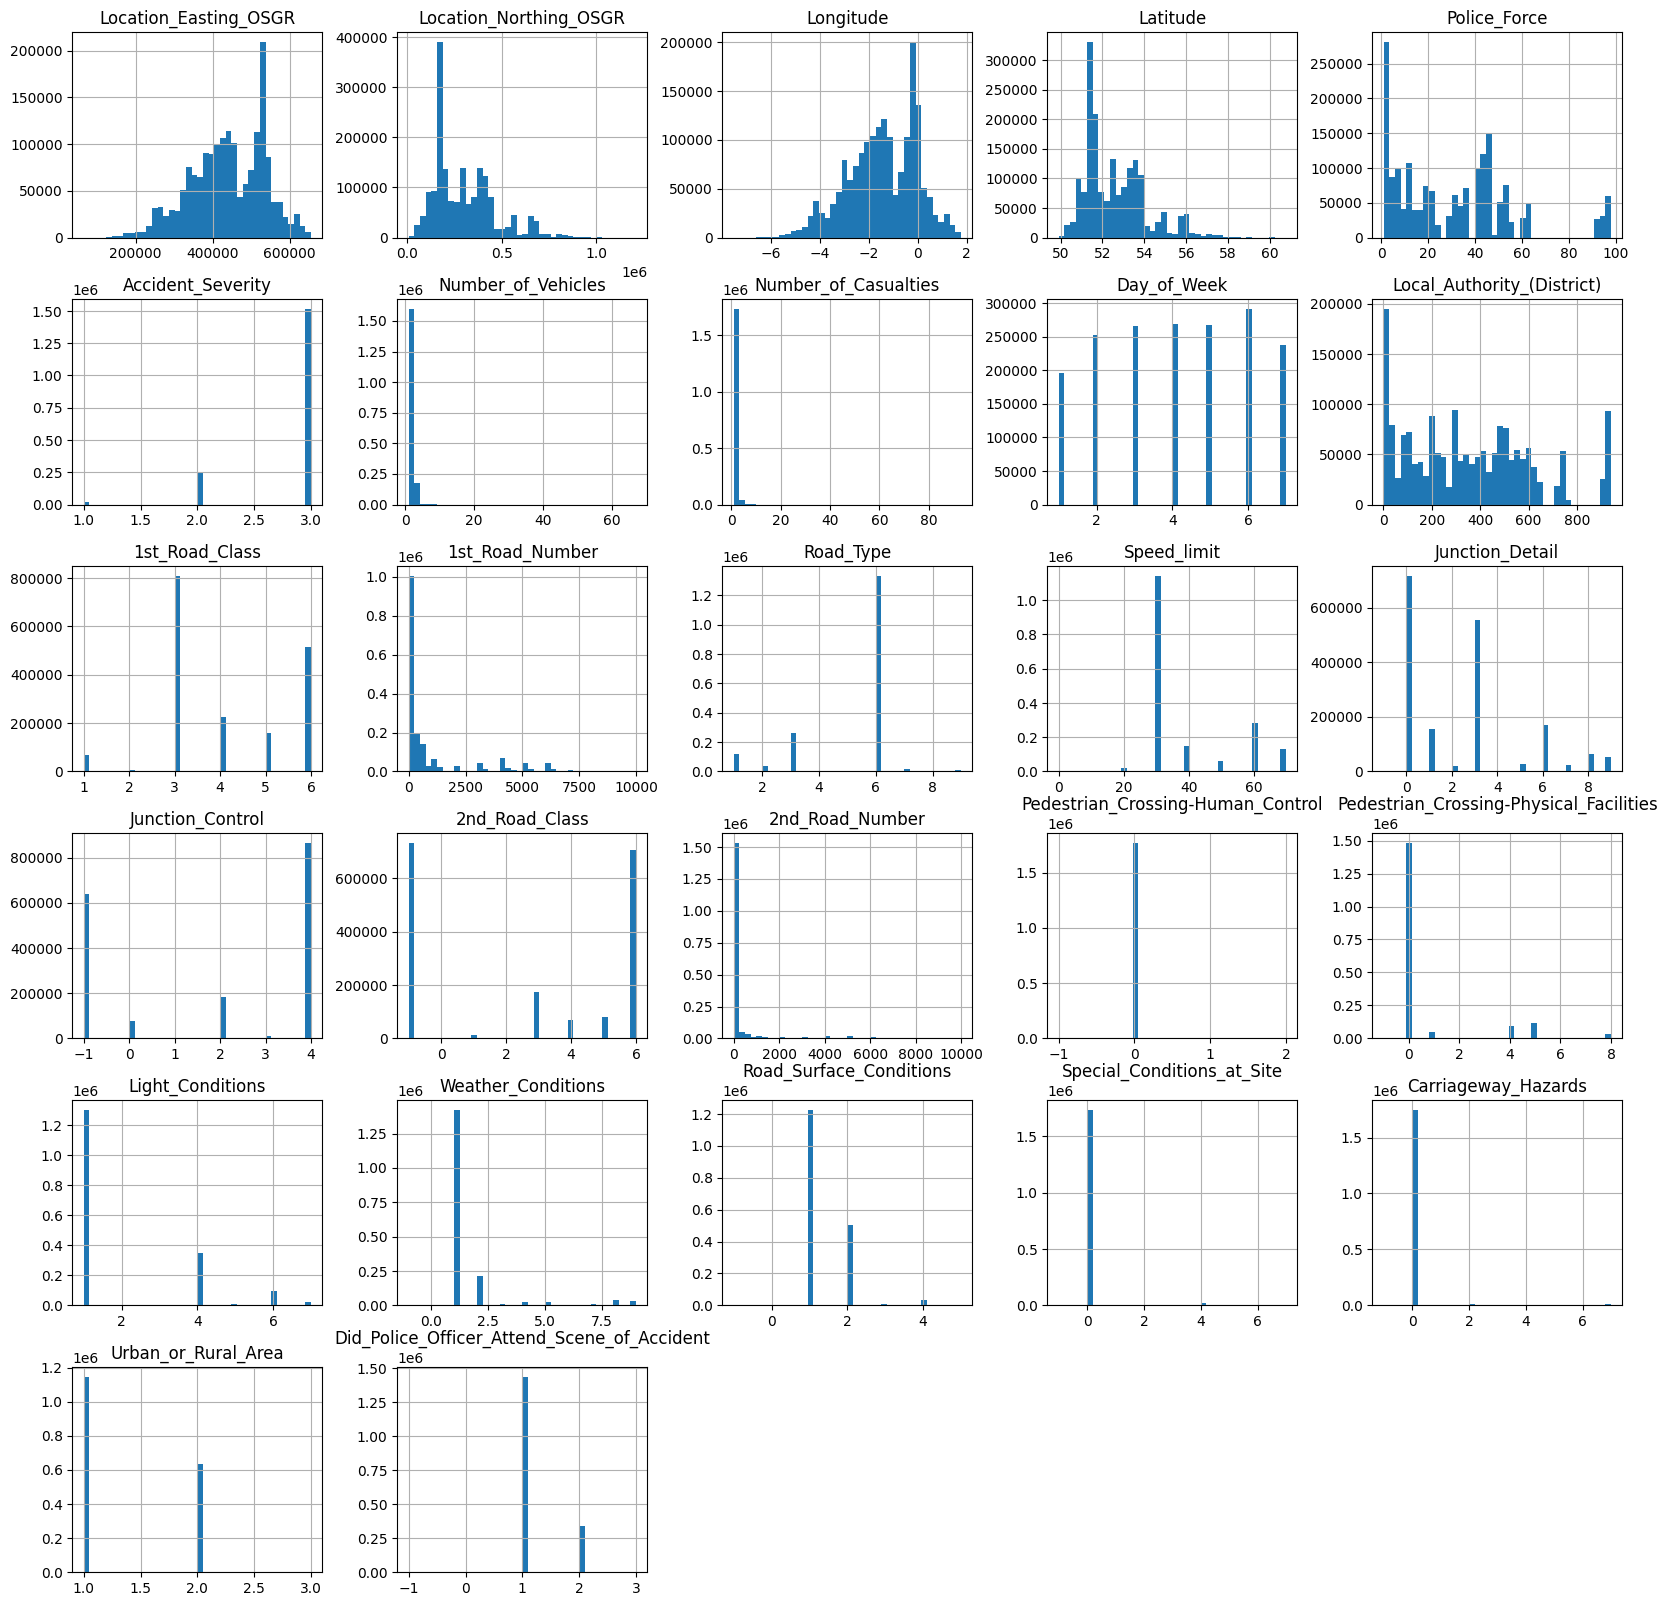

In [278]:
# carDf의 각 열의 전체적인 분포도 확인
carDf.hist(bins=40, figsize=(20,20))

In [279]:
# carDf의 상관관계
carDf.corr()

C:\Users\gesta\AppData\Local\Temp\ipykernel_816\3818378381.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,-0.417603,0.999354,-0.419528,-0.365654,0.016798,0.018621,-0.039198,-0.002490,-0.389461,...,0.000836,-0.029156,0.056806,0.007766,-0.029137,-0.071575,-0.014962,-0.006420,-0.096196,0.008196
Location_Northing_OSGR,-0.417603,1.000000,-0.428459,0.999973,0.179327,-0.032703,-0.041645,0.030415,0.004015,0.130928,...,0.013940,0.045893,-0.007354,0.004849,0.020143,0.082480,0.015542,0.012384,0.051838,-0.011507
Longitude,0.999354,-0.428459,1.000000,-0.430281,-0.379166,0.017286,0.019906,-0.037922,-0.002498,-0.399745,...,0.002355,-0.030400,0.055513,0.007404,-0.029158,-0.072339,-0.015124,-0.006879,-0.094575,0.008693
Latitude,-0.419528,0.999973,-0.430281,1.000000,0.177235,-0.032671,-0.041429,0.030571,0.004012,0.129171,...,0.014574,0.045845,-0.007251,0.004836,0.020073,0.082378,0.015484,0.012262,0.051328,-0.011332
Police_Force,-0.365654,0.179327,-0.379166,0.177235,1.000000,-0.036064,-0.016421,0.006277,0.000270,0.981562,...,-0.018245,0.045192,-0.072144,0.019546,0.047121,0.081605,0.024301,0.028723,0.240244,-0.013617
Accident_Severity,0.016798,-0.032703,0.017286,-0.032671,-0.036064,1.000000,0.074935,-0.084120,0.002557,-0.036666,...,0.025427,0.004786,0.008151,-0.063295,0.021659,0.009442,0.001850,-0.000639,-0.083937,0.115551
Number_of_Vehicles,0.018621,-0.041645,0.019906,-0.041429,-0.016421,0.074935,1.000000,0.237075,-0.000193,-0.011364,...,0.024153,-0.017139,-0.048588,-0.084360,-0.020934,-0.041634,-0.011098,-0.045287,0.040479,-0.032007
Number_of_Casualties,-0.039198,0.030415,-0.037922,0.030571,0.006277,-0.084120,0.237075,1.000000,-0.000943,0.013594,...,0.001271,-0.007907,-0.028036,0.036751,-0.004553,0.028243,0.012390,0.003284,0.115843,-0.105524
Day_of_Week,-0.002490,0.004015,-0.002498,0.004012,0.000270,0.002557,-0.000193,-0.000943,1.000000,0.000179,...,0.000459,0.000625,0.007078,0.007985,-0.001591,-0.011007,-0.003168,-0.003722,-0.016750,0.004019
Local_Authority_(District),-0.389461,0.130928,-0.399745,0.129171,0.981562,-0.036666,-0.011364,0.013594,0.000179,1.000000,...,-0.016554,0.040541,-0.084205,0.017937,0.049615,0.081105,0.024761,0.028428,0.253254,-0.009919


C:\Users\gesta\AppData\Local\Temp\ipykernel_816\3213358296.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

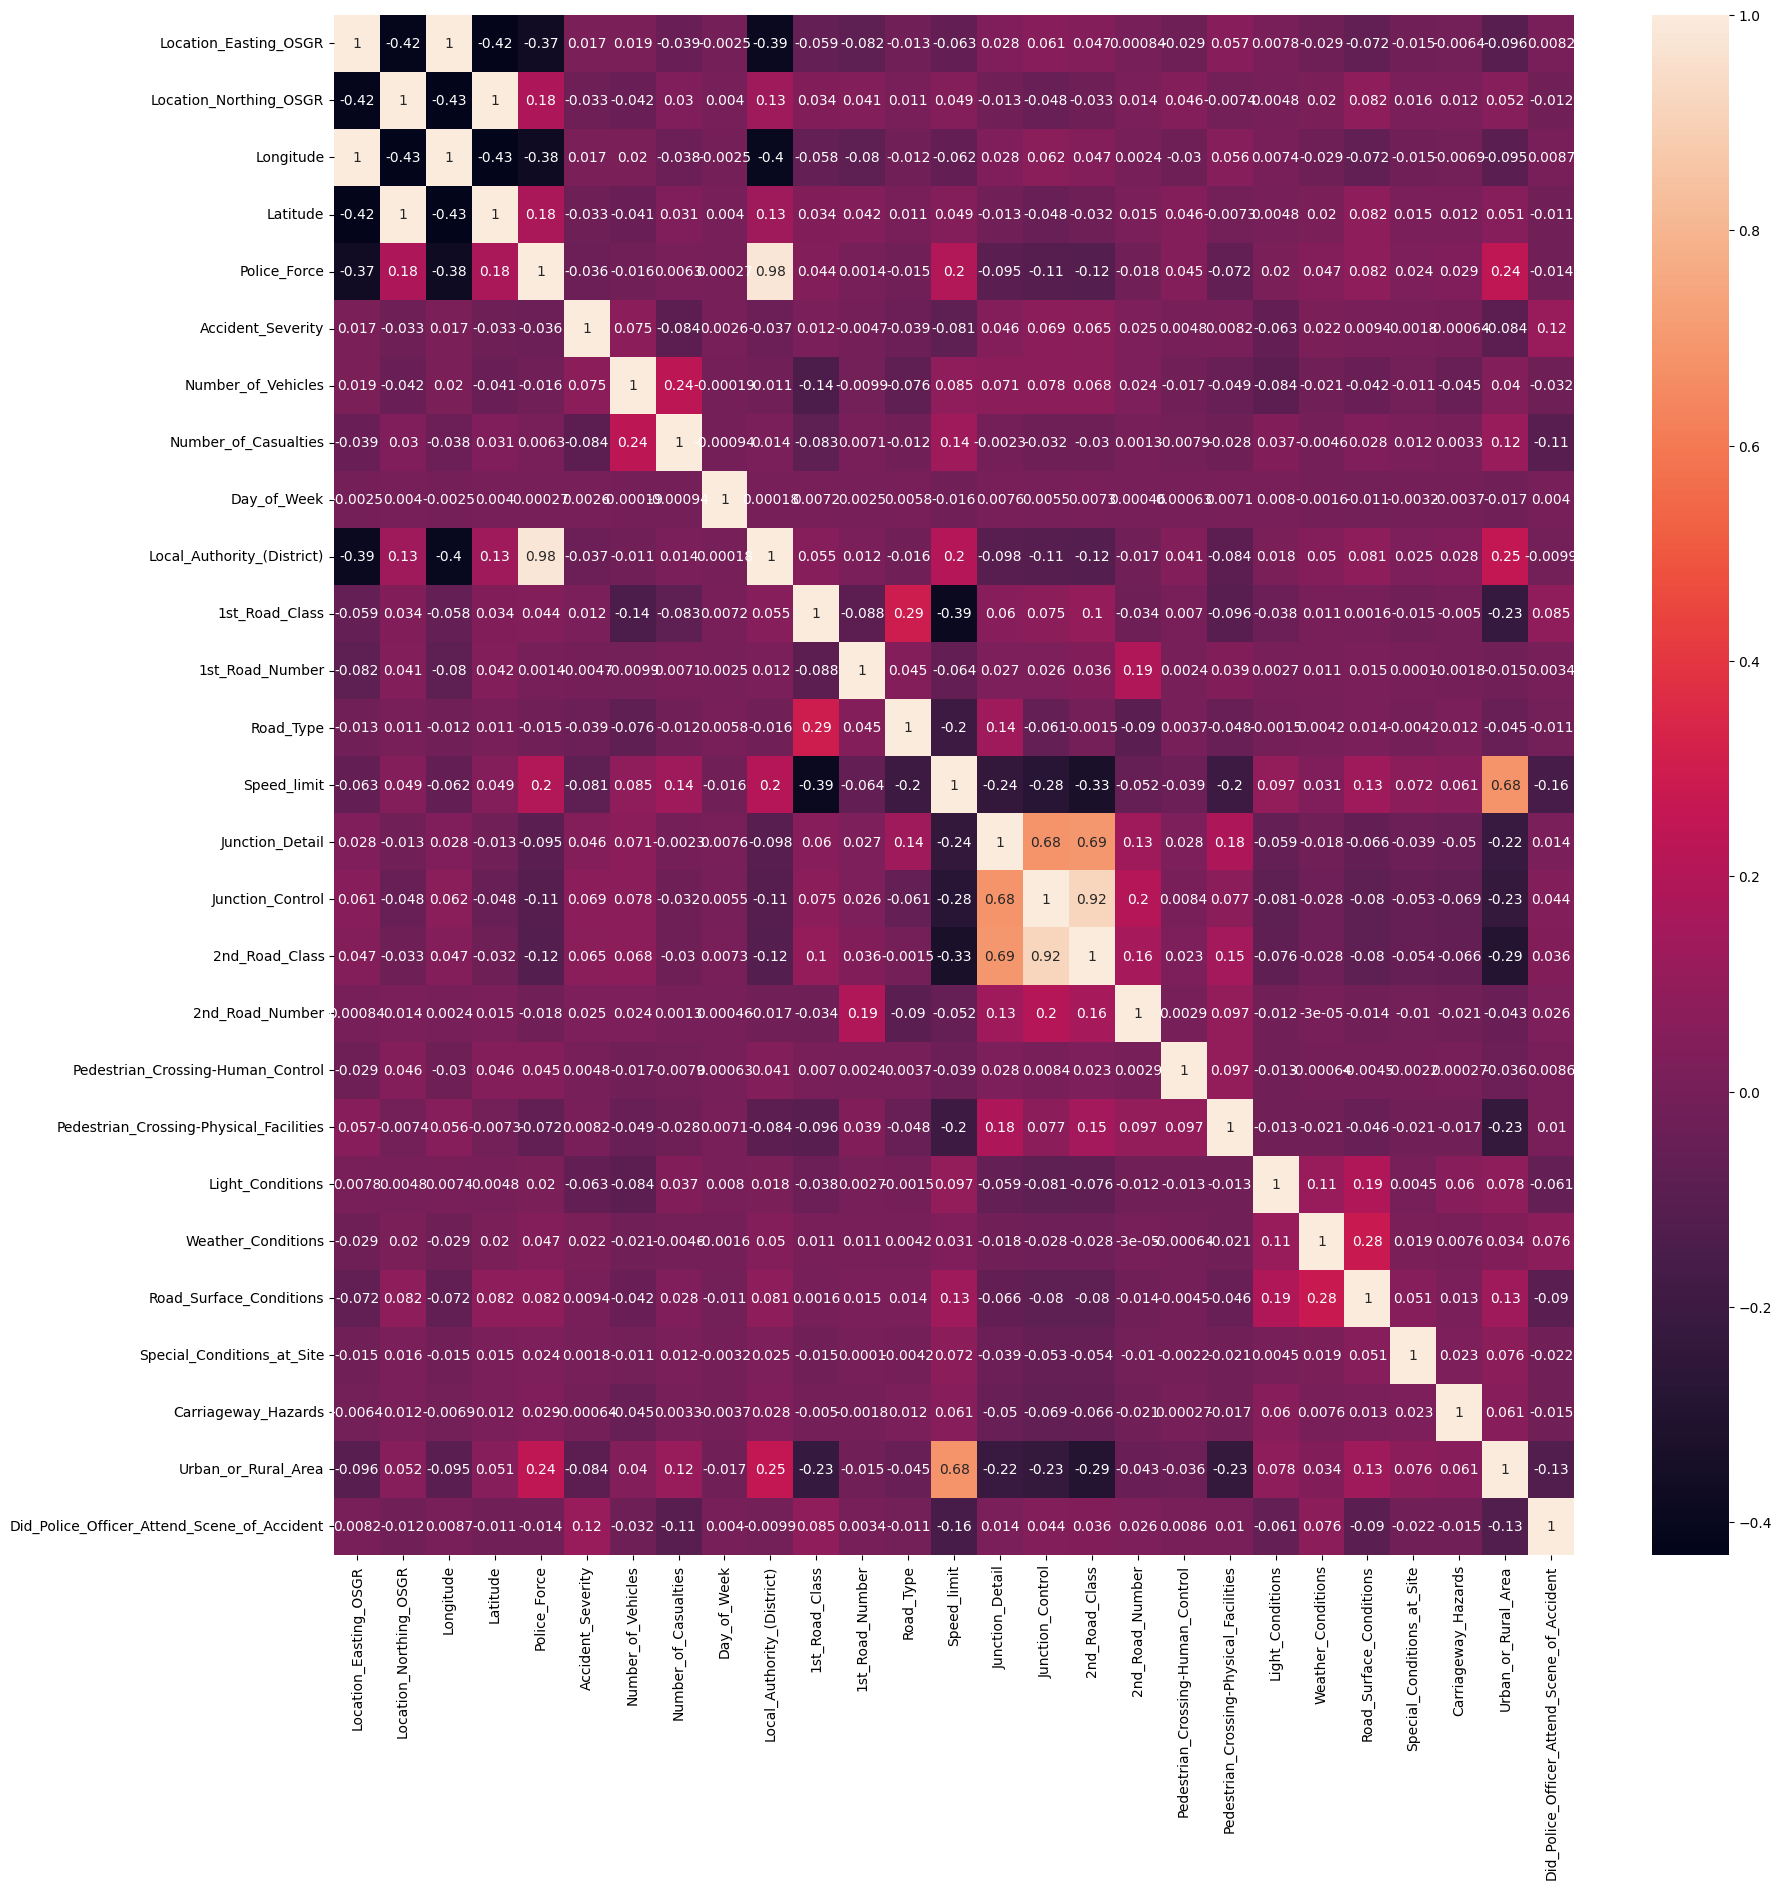

In [280]:
# carDf의 상관관계 heatmap으로 나타내기
plt.figure(figsize = (20,20))
sns.heatmap(carDf.corr(), annot=True)

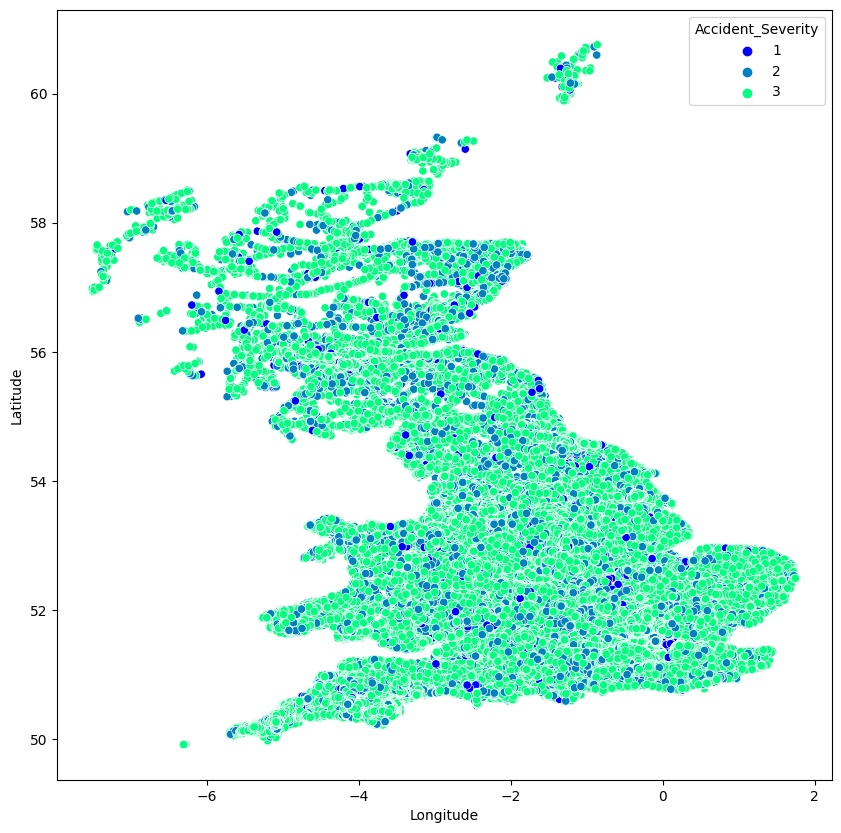

In [281]:
# scatter plot을 이용해서 지도 모양의 severity를 나타내기
plt.figure(figsize = (10,10))
sns.scatterplot(data=carDf, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.show()

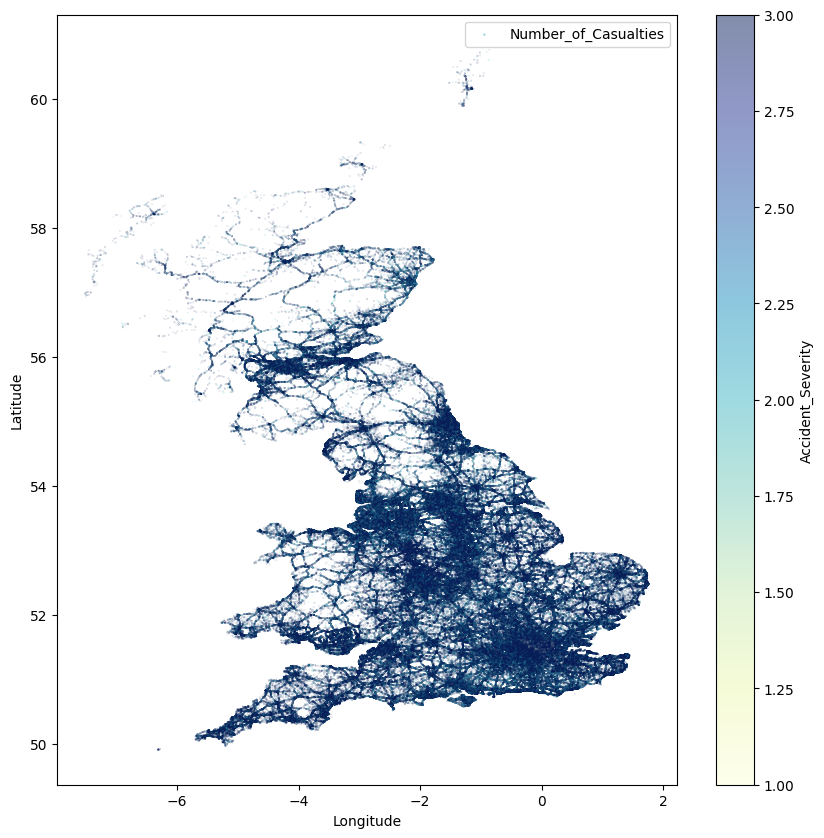

In [282]:
# scatter plot을 이용해서 casualties 나타내기
carDf.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.5,
             s = carDf["Number_of_Casualties"]/100, label = "Number_of_Casualties", figsize=(10,10),
             c = "Accident_Severity", cmap = "YlGnBu", colorbar= True
             )
plt.legend()

<AxesSubplot: >

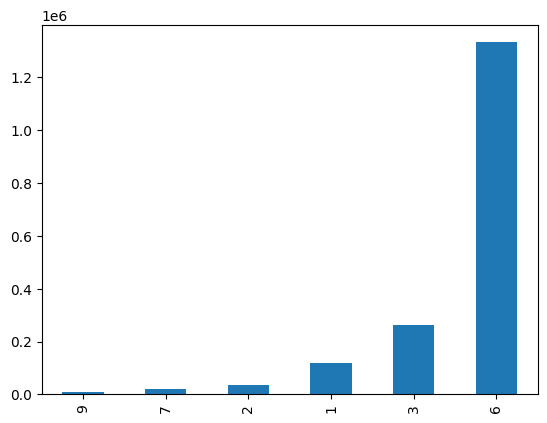

In [283]:
# Road_Type의 분포 bar graph로 다시 한 번 보여주기
carDf["Road_Type"].value_counts().sort_values().plot.bar()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '9')])

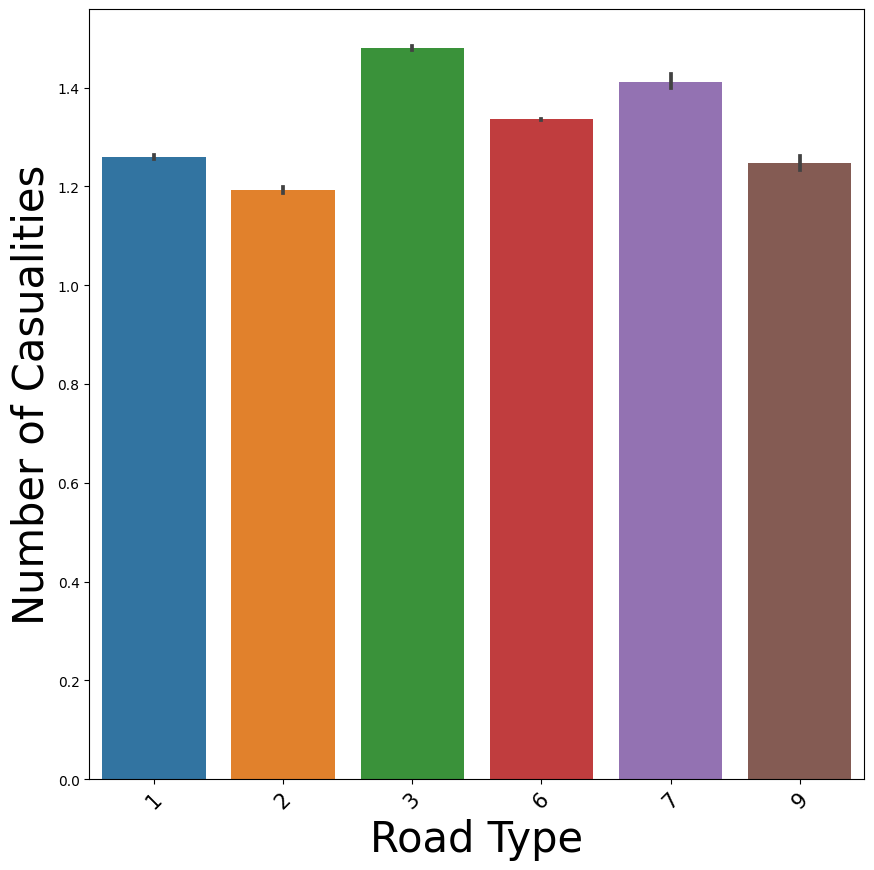

In [284]:
# Road_Type과 Number_of_Casualties의 관계를 bar graph로 보여주기
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Road_Type", y = "Number_of_Casualties", data = carDf, ax = ax)
plt.ylabel("Number of Casualities", fontsize = 30)
plt.xlabel("Road Type", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '9')])

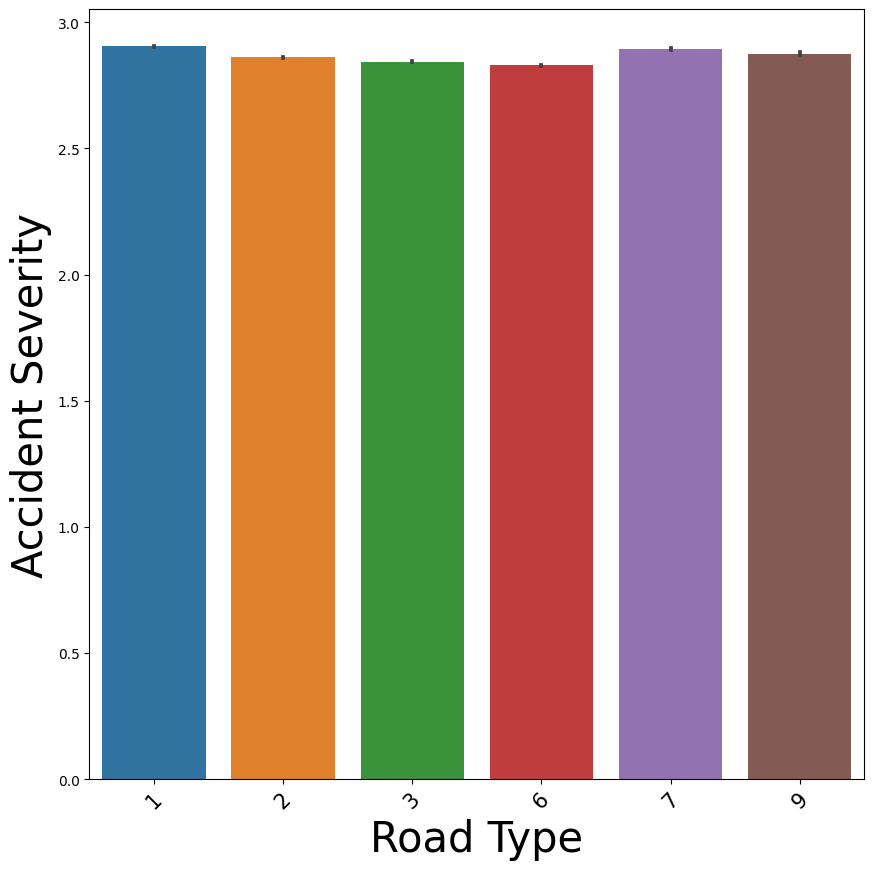

In [285]:
# Road_Type과 Accident_Severity의 관계를 bar graph로 보여주기
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Road_Type", y = "Accident_Severity", data = carDf, ax = ax)
plt.ylabel("Accident Severity", fontsize = 30)
plt.xlabel("Road Type", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

<AxesSubplot: >

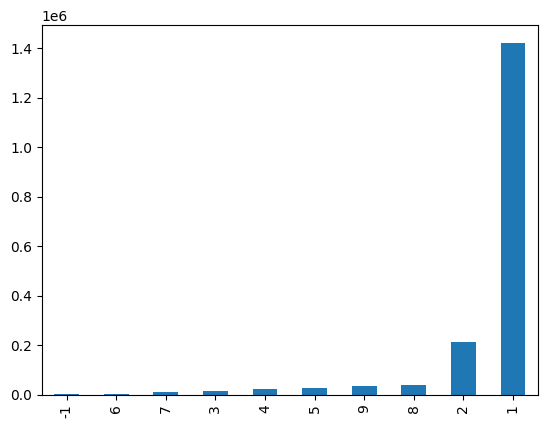

In [286]:
# Weather_Conditions의 분포 bar graph로 다시 한 번 보여주기
carDf["Weather_Conditions"].value_counts().sort_values().plot.bar()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '-1'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

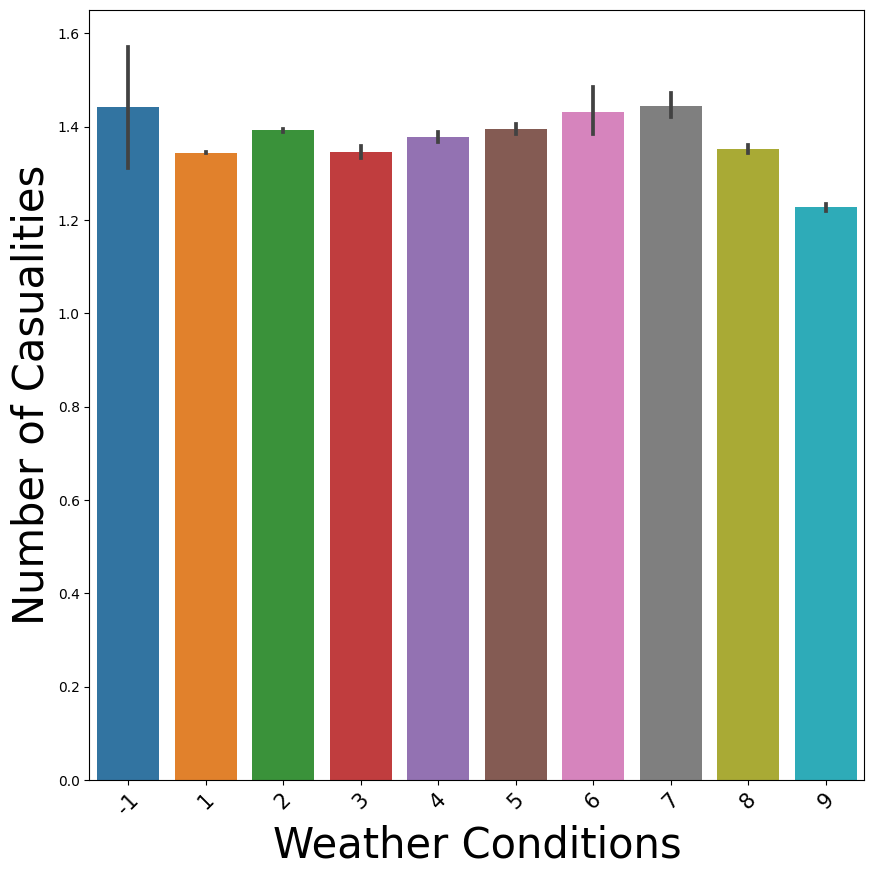

In [287]:
# Weather_Conditions과 Number_of_Casualties의 관계를 bar graph로 보여주기
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Weather_Conditions", y = "Number_of_Casualties", data = carDf, ax = ax)
plt.ylabel("Number of Casualities", fontsize = 30)
plt.xlabel("Weather Conditions", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '-1'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

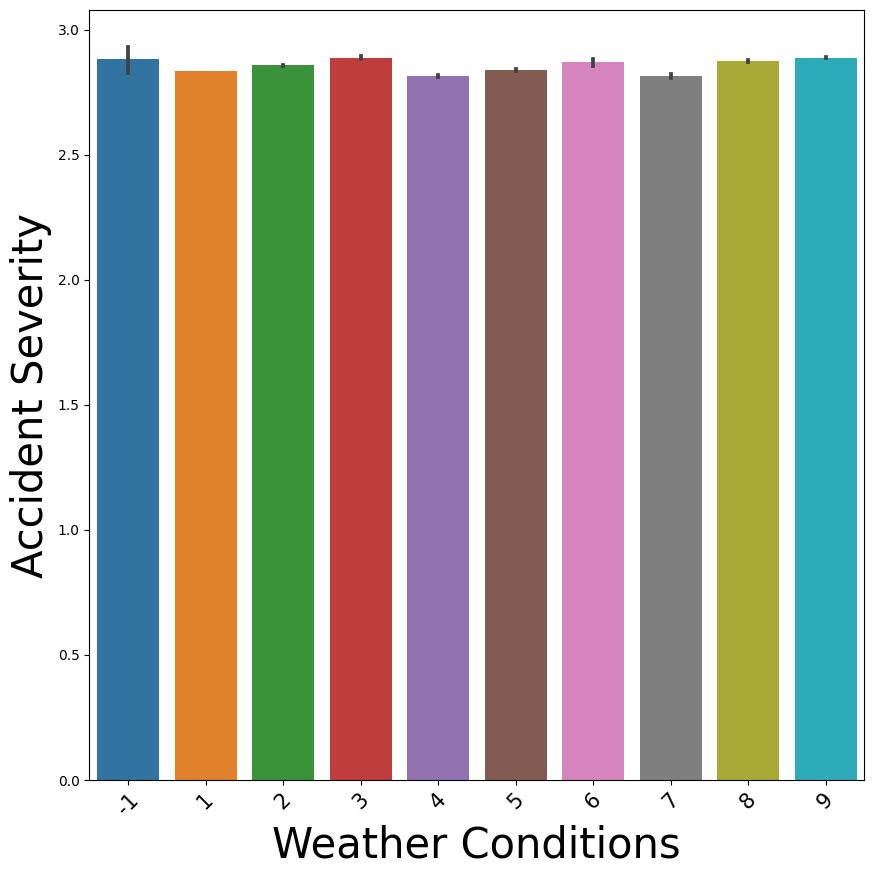

In [288]:
# Weather_Conditions과 Accident_Severity의 관계를 bar graph로 보여주기
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Weather_Conditions", y = "Accident_Severity", data = carDf, ax = ax)
plt.ylabel("Accident Severity", fontsize = 30)
plt.xlabel("Weather Conditions", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

In [289]:
# date를 datetime 형식으로 변환하는 함수 작성
def full_date(row):
    try:
        newdate = datetime.strptime(row['Date'] + ' ' + str(row['Time']), '%d/%m/%Y %H:%M') 
    except:
        row['Time'] = '00:00'
        newdate = datetime.strptime(row['Date'] + ' ' + str(row['Time']), '%d/%m/%Y %H:%M')
    return newdate

In [290]:
# full_date 함수 실행
carDf['FullDate'] = carDf.apply(lambda row: full_date(row),axis=1)
carDf['datetime'] = pd.to_datetime(carDf['FullDate'])

<AxesSubplot: xlabel='FullDate'>

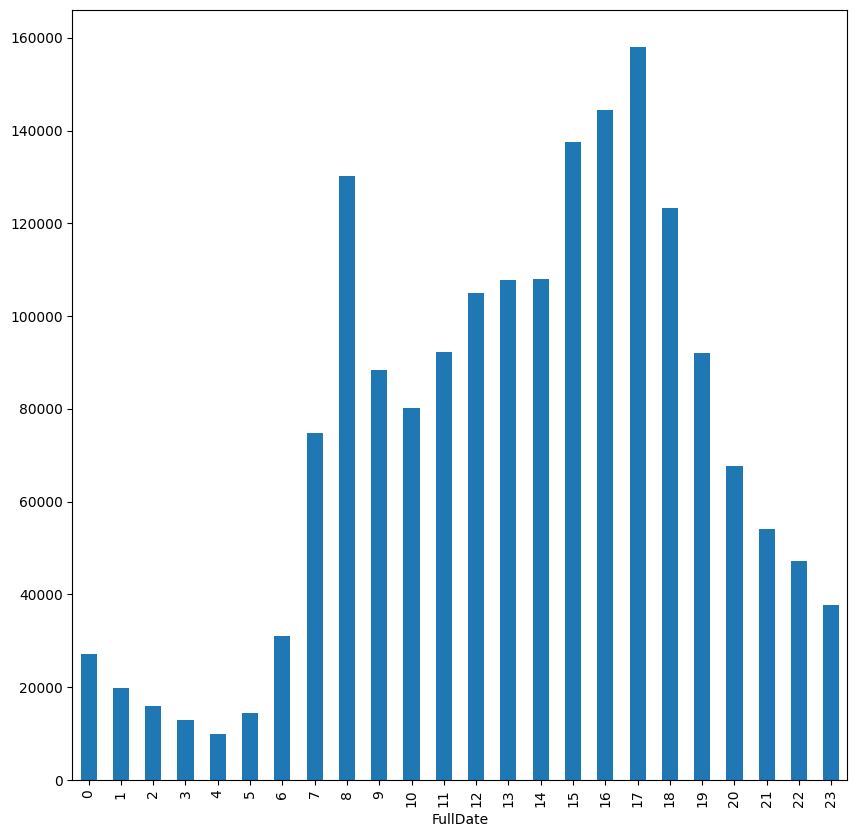

In [291]:
# 몇 시에 사고가 많이 났는 지 확인
plt.figure(figsize=(10,10))
carDf['FullDate'].groupby(carDf['FullDate'].dt.hour).count().plot(kind="bar")

In [292]:
# severity에 따라 연도와 달로 나누기
df = carDf.set_index('datetime')
df.drop(['Date'], axis=1, inplace=True)

df.head()
df_years = df['FullDate'].groupby([df.index.year,df.index.month,df.Accident_Severity]).count()
df_years = df_years.reset_index(level=0, inplace=False)
df_years = df_years.rename(index=str, columns={'datetime':"year"})
df_years = df_years.reset_index(level=0, inplace=False)
df_years = df_years.rename(index=str, columns={'datetime':"month"})
df_years = df_years.reset_index(level=0, inplace=False)

In [293]:
# 만들어진 데이터프레임 나타내기
df_pivot = pd.pivot_table(df_years, index=['month'],columns=['Accident_Severity','year'], values=['FullDate'])
df_pivot

FullDate                                               ...  \
Accident_Severity        1                                               ...   
year                  2005 2006 2007 2008 2009 2010 2011 2012 2013 2014  ...   
month                                                                    ...   
1                      241  222  239  208  189  120  148  130  121  118  ...   
10                     259  283  245  233  169  170  142  126  151  140  ...   
11                     293  256  238  211  165  150  163  135  145  161  ...   
12                     275  286  235  198  148  106  150  172  144  179  ...   
2                      197  231  173  169  158  126  131  115   91  112  ...   
3                      237  184  212  176  164  136  146  149  109  126  ...   
4                      198  231  231  174  177  124  150  114  127  135  ...   
5                      224  217  230  209  174  164  137  138  155  121  ...   
6                      244  239  201  164  170  153  165  121  127  147  ...   
7                      238  241  225  234  173  133  145  151  152  134  ...   
8                      244  263  260  182  199  185  163  138  138  138  ...   
9                      263  273  225  183  171  164  157  148  147  147  ...   

                                                                           \
Accident_Severity      3                                                    
year                2006   2007   2008   2009   2010   2011   2012   2013   
month                                                                       
1                  12705  13107  12126  11488   9273  10058  10063   8784   
10                 14624  13187  13358  12673  12332  11704  11222  11377   
11                 14870  14175  12654  13416  12633  11229  11287  11245   
12                 13809  12603  11815  11964   9063  10866   9977  10115   
2                  12064  11439  12271   9384  10179   9561   9220   8308   
3                  12862  12883  11500  11291  11317  10589  10237   8828   
4                  11722  11815  11414  10684  10391  10398   9257   8388   
5                  13760  13613  12112  11671  11149  10745  10353   9583   
6                  13518  13235  11966  11751  11582  11110   9699   9969   
7                  14082  13419  12415  12226  11487  11082  10778  10890   
8                  12962  12652  11278  11343  11049  10101   9966   9832   
9                  14279  12922  12200  11594  11780  11240  10972  10105   

                                 
Accident_Severity                
year                2014   2015  
month                            
1                  10365   9962  
10                 11410  10441  
11                 11324  10472  
12                 10252   9749  
2                   9263   8799  
3                  10110   9348  
4                   9255   9190  
5                  10445   9560  
6                  10477  10199  
7                  10956  10810  
8                  10218   9512  
9                   9913  10323  

[12 rows x 33 columns]

<AxesSubplot: title={'center': 'Slight'}, xlabel='month'>

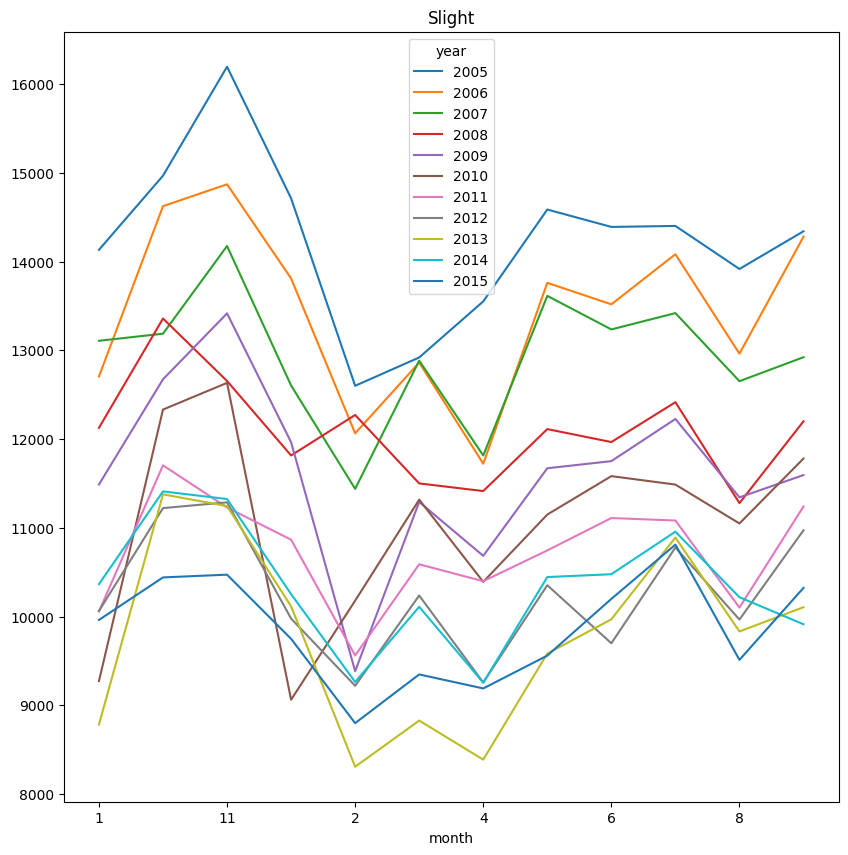

In [294]:
# 연도에 따라 slight severity 나타내기
df_pivot['FullDate']['3'].plot(figsize=(10,10),title='Slight')

<AxesSubplot: title={'center': 'serious'}, xlabel='month'>

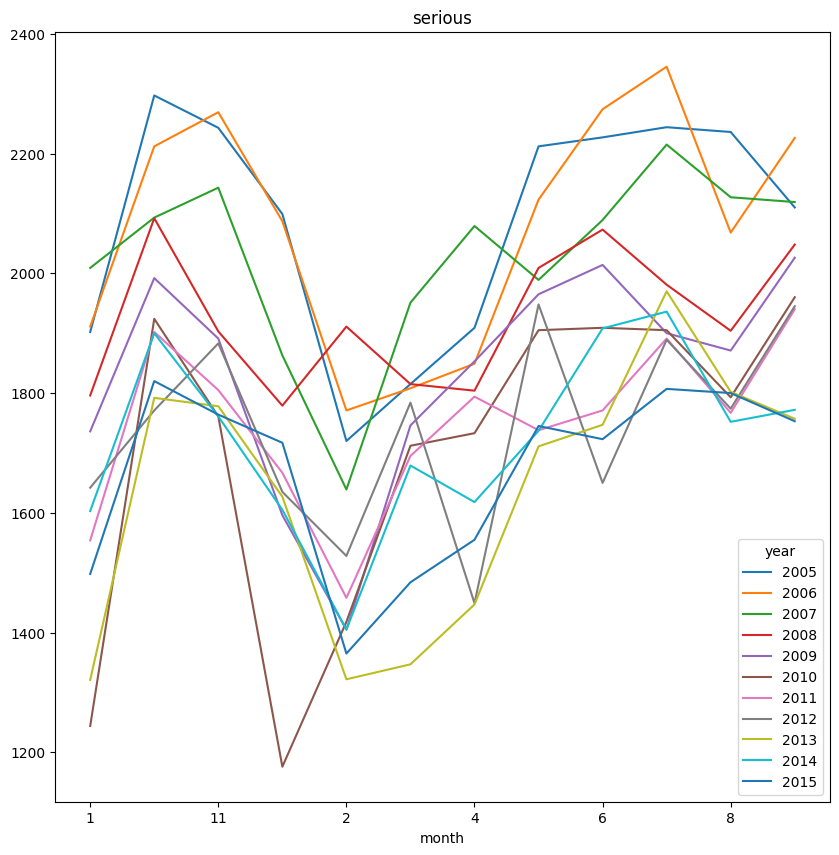

In [295]:
# 연도에 따라 serious severity 나타내기
df_pivot['FullDate']['2'].plot(figsize=(10,10),title='serious')

<AxesSubplot: title={'center': 'Fatal'}, xlabel='month'>

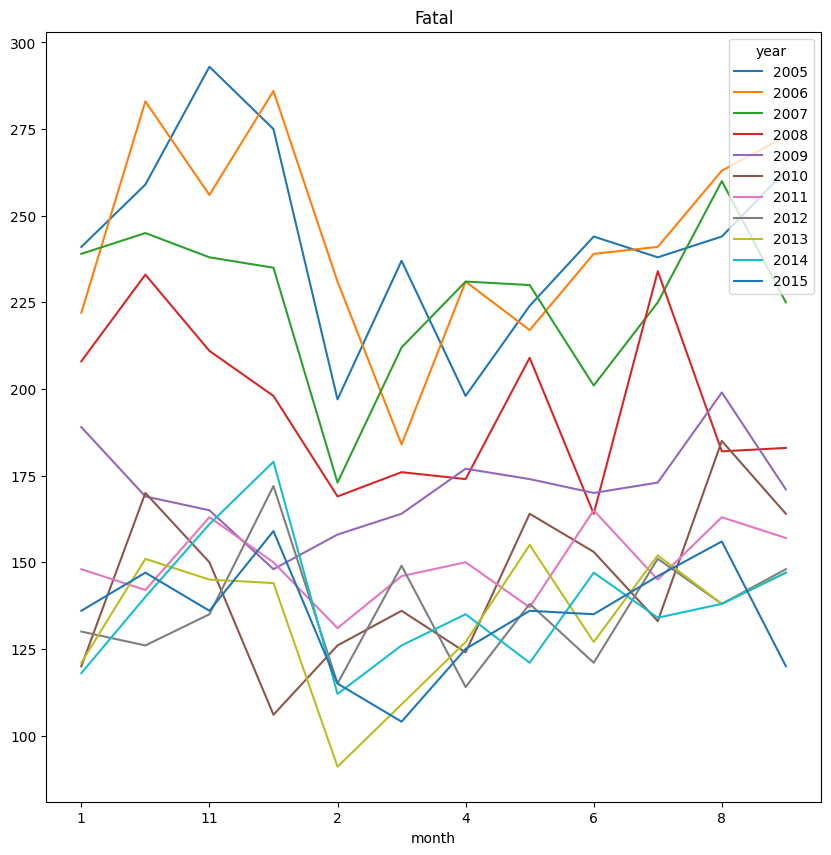

In [296]:
# 연도에 따라 fatal severity 나타내기
df_pivot['FullDate']['1'].plot(figsize=(10,10),title='Fatal')

In [297]:
# 필요없는 column 버리기
carDf.drop(["Carriageway_Hazards", "Date", "Day_of_Week", "2nd_Road_Number"], axis =1, inplace = True)

In [298]:
# 데이터를 수치로 변환해주는 전처리 진행
carDfg = pd.get_dummies(carDf[["Road_Type",
                            "Pedestrian_Crossing-Human_Control", 
                            "Pedestrian_Crossing-Physical_Facilities", 
                            "Light_Conditions", 
                            "Weather_Conditions", 
                            "Road_Surface_Conditions"]], drop_first = True)

In [299]:
carDfg

,Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,6,0,1,1,2,2
1,3,0,5,4,1,1
2,6,0,0,4,1,1
3,6,0,0,1,1,1
4,6,0,0,7,1,2
...,...,...,...,...,...,...
1780648,6,0,0,1,1,2
1780649,6,0,0,1,1,2
1780650,3,0,0,6,4,2
1780651,6,0,0,1,2,2


In [300]:
# 데이터 프레임 합치기
data = pd.concat([carDf, carDfg], axis = 1)

In [301]:
data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Time,...,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,FullDate,datetime,Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,17:42,...,1,1,2005-01-04 17:42:00,2005-01-04 17:42:00,6,0,1,1,2,2
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,17:36,...,1,1,2005-01-05 17:36:00,2005-01-05 17:36:00,3,0,5,4,1,1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,00:15,...,1,1,2005-01-06 00:15:00,2005-01-06 00:15:00,6,0,0,4,1,1
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,10:35,...,1,1,2005-01-07 10:35:00,2005-01-07 10:35:00,6,0,0,1,1,1
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,21:13,...,1,1,2005-01-10 21:13:00,2005-01-10 21:13:00,6,0,0,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780648,2015984139115,312087.0,570791.0,-3.376671,55.023855,98,3,3,1,13:24,...,2,1,2015-12-11 13:24:00,2015-12-11 13:24:00,6,0,0,1,1,2
1780649,2015984139715,320671.0,569791.0,-3.242159,55.016316,98,3,2,1,13:50,...,2,1,2015-12-02 13:50:00,2015-12-02 13:50:00,6,0,0,1,1,2
1780650,2015984140215,311731.0,586343.0,-3.387067,55.163502,98,2,1,4,00:01,...,2,1,2015-12-23 00:01:00,2015-12-23 00:01:00,3,0,0,6,4,2
1780651,2015984140515,328273.0,570137.0,-3.123385,55.020580,98,3,3,3,12:40,...,2,1,2015-12-26 12:40:00,2015-12-26 12:40:00,6,0,0,1,2,2


In [302]:
# 필요없는 데이터 버리기
data.drop(["Road_Type",
            "Pedestrian_Crossing-Human_Control", 
            "Pedestrian_Crossing-Physical_Facilities", 
            "Light_Conditions", 
            "Weather_Conditions", 
            "Road_Surface_Conditions",
            "Did_Police_Officer_Attend_Scene_of_Accident"], axis =1, inplace = True)

In [303]:
# x값과 y값으로 사용할 데이터 설정
X = data.drop("Accident_Severity", axis =1)
y = data["Accident_Severity"]

In [304]:
# train과 test dataset으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [305]:
# train set의 갯수 확인
X_train.shape

(1424291, 21)

In [306]:
# train set의 column 확인 
X_train.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       'Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'FullDate',
       'datetime'],
      dtype='object')

In [307]:
# X_train에 사용할 column 정하기
X_train_ = X_train[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', '1st_Road_Class',
       '1st_Road_Number', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', 'Urban_or_Rural_Area']]

In [308]:
# knn 모델 정의 및 학습
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')
knn.fit(X_train_, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [309]:
# X_test에 사용할 column 정하기
X_test_ = X_test[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', '1st_Road_Class',
       '1st_Road_Number', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', 'Urban_or_Rural_Area']]

In [310]:
# 결과값 예측
y_pred = knn.predict(X_test_)

In [311]:
# 예측값 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.03      0.07      0.05      4567
           2       0.16      0.28      0.20     48034
           3       0.86      0.74      0.80    303472

    accuracy                           0.67    356073
   macro avg       0.35      0.36      0.35    356073
weighted avg       0.76      0.67      0.71    356073



In [312]:
# confusion matrix 보여주기
confusion_matrix(y_test, y_pred)

array([[   300,   1393,   2874],
       [  1558,  13364,  33112],
       [  6864,  70897, 225711]], dtype=int64)

In [313]:
# 정확도 출력하기
accuracy_score(y_test, y_pred)

0.6722638335397517

In [314]:
# decision tree를 이용하여 예측
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_, y_train)
Y_pred = decision_tree.predict(X_test_)
acc_decision_tree1 = round(decision_tree.score(X_test_, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 74.97
              precision    recall  f1-score   support

           1   0.040930  0.045106  0.042917      4567
           2   0.172037  0.185639  0.178579     48034
           3   0.861635  0.849528  0.855539    303472

    accuracy                       0.749652    356073
   macro avg   0.358200  0.360091  0.359012    356073
weighted avg   0.758082  0.749652  0.753795    356073



Predicted,1,2,3,All
Actual,,,,
1,206,1020,3341,4567
2,1058,8917,38059,48034
3,3769,41895,257808,303472
All,5033,51832,299208,356073


In [315]:
# random forest를 이용하여 예측
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train_,y_train)
Y_pred = random_forest.predict(X_test_)
random_forest.score(X_test_, y_test)
acc_random_forest1 = round(random_forest.score(X_test_, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 81.82
              precision    recall  f1-score   support

           1   0.062232  0.019050  0.029170      4567
           2   0.204473  0.084315  0.119397     48034
           3   0.857699  0.946433  0.899884    303472

    accuracy                       0.818240    356073
   macro avg   0.374801  0.349933  0.349484    356073
weighted avg   0.759377  0.818240  0.783429    356073



Predicted,1,2,3,All
Actual,,,,
1,87,492,3988,4567
2,320,4050,43664,48034
3,991,15265,287216,303472
All,1398,19807,334868,356073
